In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_dir = 'data/'
filename = '01.2023_tempdata.parquet'

to_drop = ['location', 'kiosk', 'rack', 'chassis', 'blade']

df_slurm = pd.read_parquet(data_dir + filename).drop(to_drop, axis=1)
print(f'Size of the dataframe: {df_slurm.shape}')
df_slurm.head()

Size of the dataframe: (24544205, 6)


,date,hostname,cpu1,cpu2,power,cpus_alloc
0,2023-01-01 00:00:01+01:00,e1242,47,44,496,47
1,2023-01-01 00:00:01+01:00,e1105,44,45,492,48
2,2023-01-01 00:00:01+01:00,e1473,48,44,468,42
3,2023-01-01 00:00:01+01:00,e1602,48,39,452,42
4,2023-01-01 00:00:01+01:00,e1864,47,43,448,34


In [109]:
slurm_filenames = 'temp_data'
df_slurm = pd.DataFrame()
for i in range(1, 4):
    df_slurm_tmp = pd.read_parquet(data_dir + slurm_filenames + str(i) + '.parquet').drop(to_drop, axis=1)
    df_slurm = pd.concat([df_slurm, df_slurm_tmp], ignore_index=True)
df_slurm = df_slurm.reset_index(drop=True)
print(f'Size of df_slurm: {df_slurm.shape}')
df_slurm.head()

Size of df_slurm: (15000000, 7)


,date,@timestamp,hostname,cpu1,cpu2,power,cpus_alloc
0,2023-02-01T00:01:01+0100,2023-02-01T00:01:01+0100,e2120,50,47,572,48
1,2023-02-01T00:01:01+0100,2023-02-01T00:01:01+0100,e2109,50,47,568,48
2,2023-02-01T00:01:01+0100,2023-02-01T00:01:01+0100,e2207,49,47,552,48
3,2023-02-01T00:01:01+0100,2023-02-01T00:01:01+0100,e2147,49,44,500,47
4,2023-02-01T00:01:01+0100,2023-02-01T00:01:01+0100,e2396,44,46,492,44


In [111]:
df_slurm['date'].astype('datetime64[s]').min()

Timestamp('2023-01-31 23:01:01')

POWER COUNTS  
**136**    1189018  
**132**     108485  
**12**        4688  
**0**            2  


POWER == 12 występuje tylko na e2015

In [86]:
df_slurm[df_slurm['power'] == 132]['hostname'].value_counts()

e1641    7875
e1326    6682
e1998    6118
e1520    5693
e1311    5592
e1509    4700
e2063    4567
e1800    4342
e1575    3520
e1694    3426
e1325    3381
e1617    2749
e1941    2574
e1579    2509
e1111    2504
e1508    2501
e1635    2241
e1604    2189
e1851    2176
e1849    1785
e1856    1723
e1573    1707
e1811    1517
e1582    1495
e1614    1347
e1528    1170
e1813    1165
e1781     876
e1869     751
e1724     605
e1137     582
e1098     515
e1979     402
e1883     282
e1196     241
e1769     220
e1609     212
e1682     137
e1717      73
e1495      65
e1855      60
e2006      55
e1629      54
e1598      46
e1681      35
e1615      32
e1524      16
e2040      13
e1583       3
e1526       2
e2039       2
Name: hostname, dtype: int64

In [104]:
import warnings
warnings.filterwarnings('ignore')

def plot_power_timeseries_of_host(host: str, ax: plt.Axes):
    mask = df_slurm['hostname'] == host
    twelve_df = df_slurm[mask]

    print(twelve_df.columns)
    # Convert date and @timestamp to datetime
    twelve_df['date'] = pd.to_datetime(twelve_df['date'])
    
    # Print max min date
    print(f'Lowest date {twelve_df["date"].min()}, highest date {twelve_df["date"].max()}')


    # Plot the data
    sns.scatterplot(x='date', y='power', data=twelve_df, ax=ax)
    ax.set_title('Power consumption of host ' + host)
    ax.set_xlabel('Date')
    ax.set_ylabel('Power consumption (W)')

    # Rotate 
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

Index(['date', 'hostname', 'cpu1', 'cpu2', 'power', 'cpus_alloc'], dtype='object')
Lowest date 2023-01-04 13:50:01+01:00, highest date 2023-01-31 22:17:02+01:00
Index(['date', 'hostname', 'cpu1', 'cpu2', 'power', 'cpus_alloc'], dtype='object')
Lowest date 2023-01-01 00:00:02+01:00, highest date 2023-01-31 22:09:02+01:00


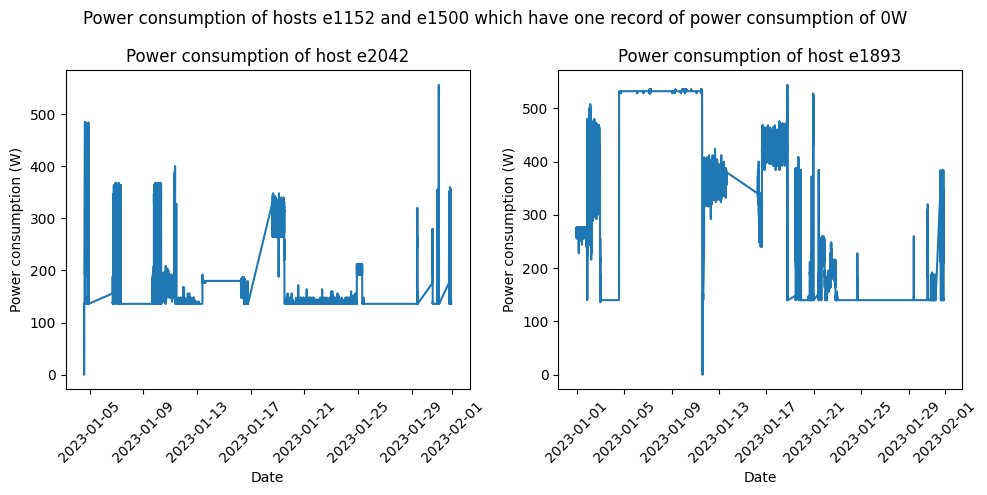

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
plot_power_timeseries_of_host('e2042', ax[0])
plot_power_timeseries_of_host('e1893', ax[1])
plt.suptitle('Power consumption of hosts e1152 and e1500 which have one record of power consumption of 0W')
plt.tight_layout()
#plt.savefig('images/_local/zero_power_consumption_hosts.png')
plt.show()

Index(['date', 'hostname', 'cpu1', 'cpu2', 'power', 'cpus_alloc'], dtype='object')
Lowest date 2023-01-04 22:03:02+01:00, highest date 2023-01-31 22:46:01+01:00


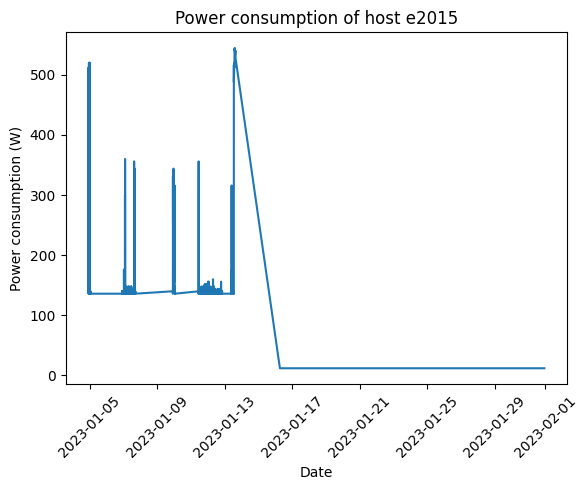

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 5))
plot_power_timeseries_of_host('e2015', ax)
plt.tight_layout()
plt.savefig('images/_local/12_power_consumption_host_january.png')
plt.show()

Index(['date', 'hostname', 'cpu1', 'cpu2', 'power', 'cpus_alloc'], dtype='object')
Lowest date 2023-01-04 00:07:02+01:00, highest date 2023-01-31 23:59:02+01:00


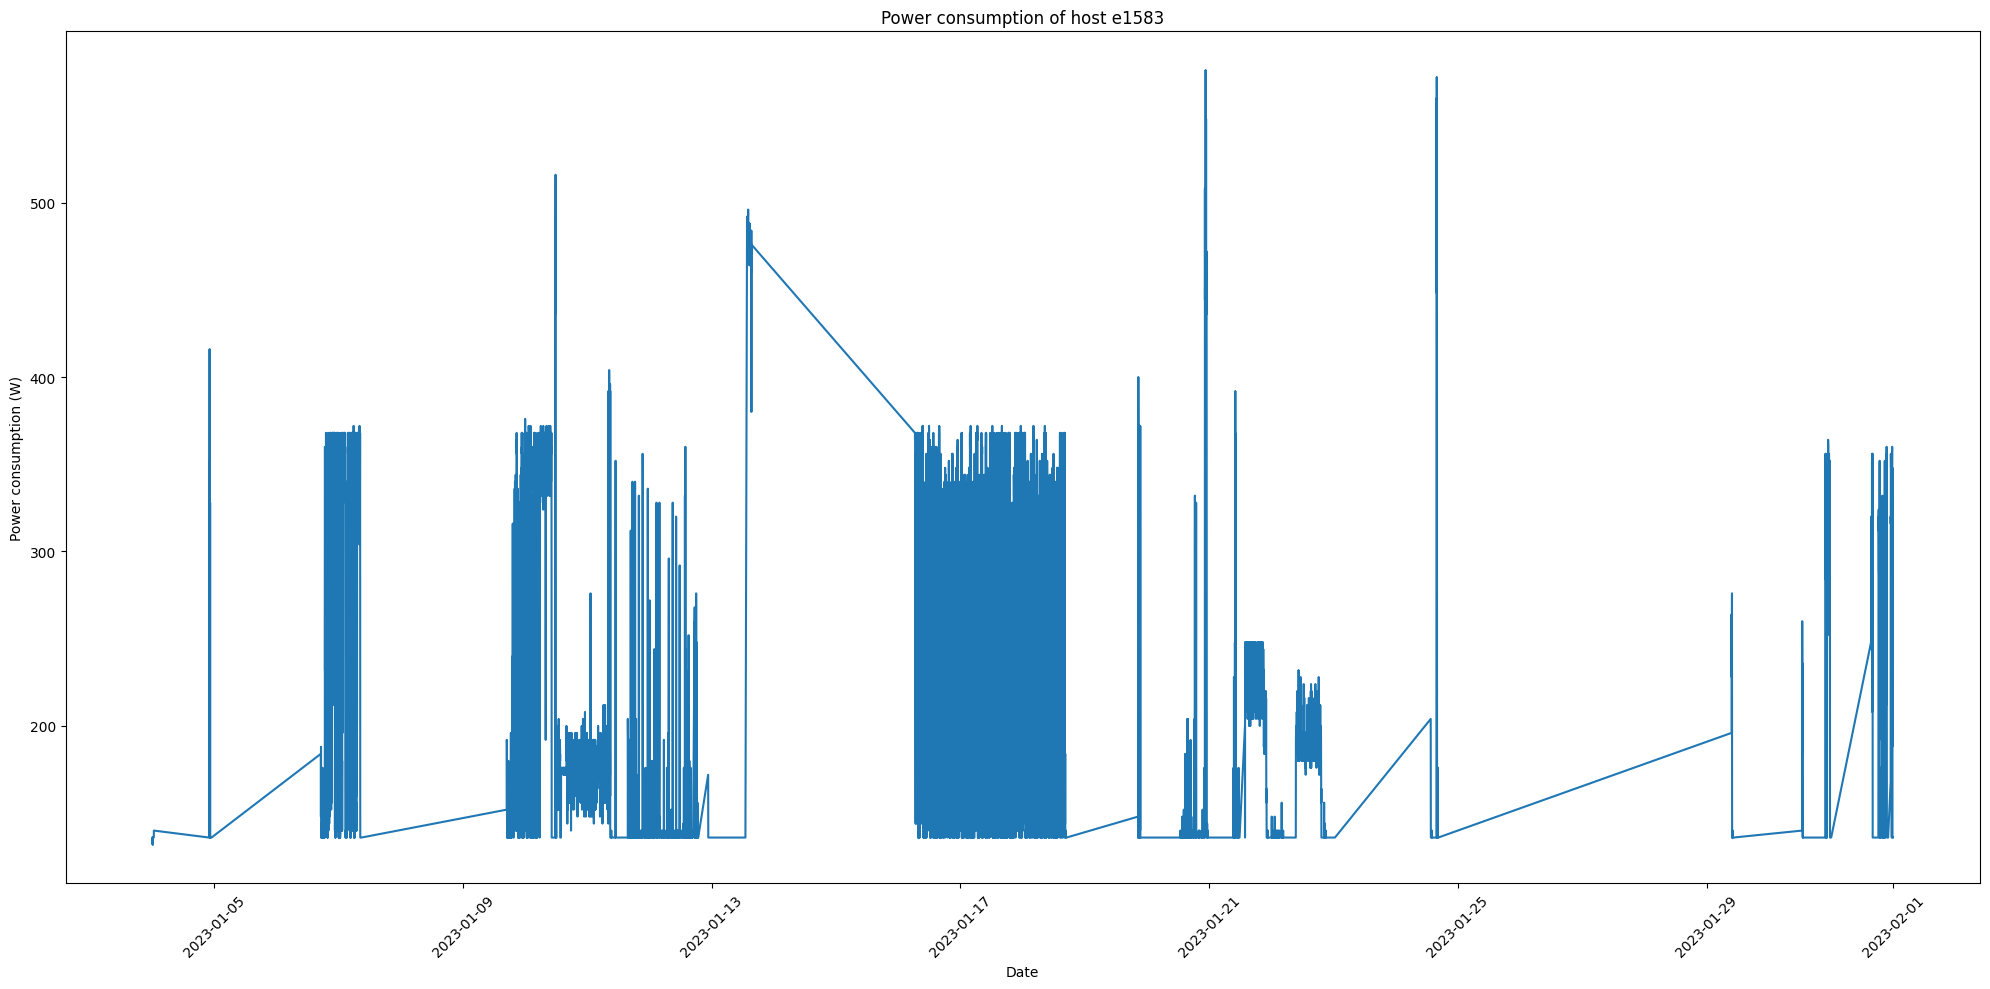

In [40]:
hostname = 'e1583'

fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plot_power_timeseries_of_host(hostname, ax)
plt.tight_layout()
plt.show()

# plot the same with plotly in browser
import plotly.express as px
import plotly.io as pio

# set render to browser
pio.renderers.default = "browser"

fig = px.scatter(df_slurm[df_slurm['hostname'] == hostname], x='date', y='power')
fig.update_layout(title=f'Power consumption of host {hostname}')
fig.show()

SAACT DATA

In [8]:
saact_data_dir = 'data/'
saact_filename = 'jobs_step_1_final.csv'

pd.set_option('display.max_columns', None)

df_saact = pd.read_csv(saact_data_dir + saact_filename)
df_saact.head()

,allocation_nodes,constraints,flags,group,nodes,partition,priority,user,required-CPUs,required-memory,state-reason,steps-nodes-list,steps-time-elapsed,steps-time-end,steps-time-start,steps-time-system-microseconds,steps-time-total-microseconds,steps-time-user-microseconds,steps-statistics-energy-consumed,steps-step-job_id,steps-tres-requested-average-energy,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
0,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1310,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1310'],11652.0,1.673428e+09,1.673417e+09,0.0,2134.0,2134.0,3149556.0,26081305.0,3149556.0,0.0,3149556.0,4468736.0,352.0,352.0,193.0,193.0,24.0,49152.0,1.0
1,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1753,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1753'],13589.0,1.673452e+09,1.673438e+09,2146.0,2146.0,0.0,3522726.0,26081310.0,3522726.0,0.0,3522726.0,4468736.0,364.0,364.0,183.0,183.0,24.0,49152.0,1.0
2,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1328,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1328'],10913.0,1.673471e+09,1.673460e+09,1410.0,2115.0,705.0,3201576.0,26081311.0,3201576.0,0.0,3201576.0,4468736.0,380.0,380.0,140.0,140.0,24.0,49152.0,1.0
3,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1194,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1194'],11530.0,1.673493e+09,1.673482e+09,2148.0,2148.0,0.0,3304818.0,26081312.0,3304818.0,0.0,3304818.0,4468736.0,376.0,376.0,198.0,198.0,24.0,49152.0,1.0
4,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1557,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1557'],11142.0,1.673536e+09,1.673525e+09,1061.0,2122.0,1061.0,4501440.0,26081314.0,4501440.0,0.0,4501440.0,4468736.0,468.0,468.0,136.0,136.0,24.0,49152.0,1.0


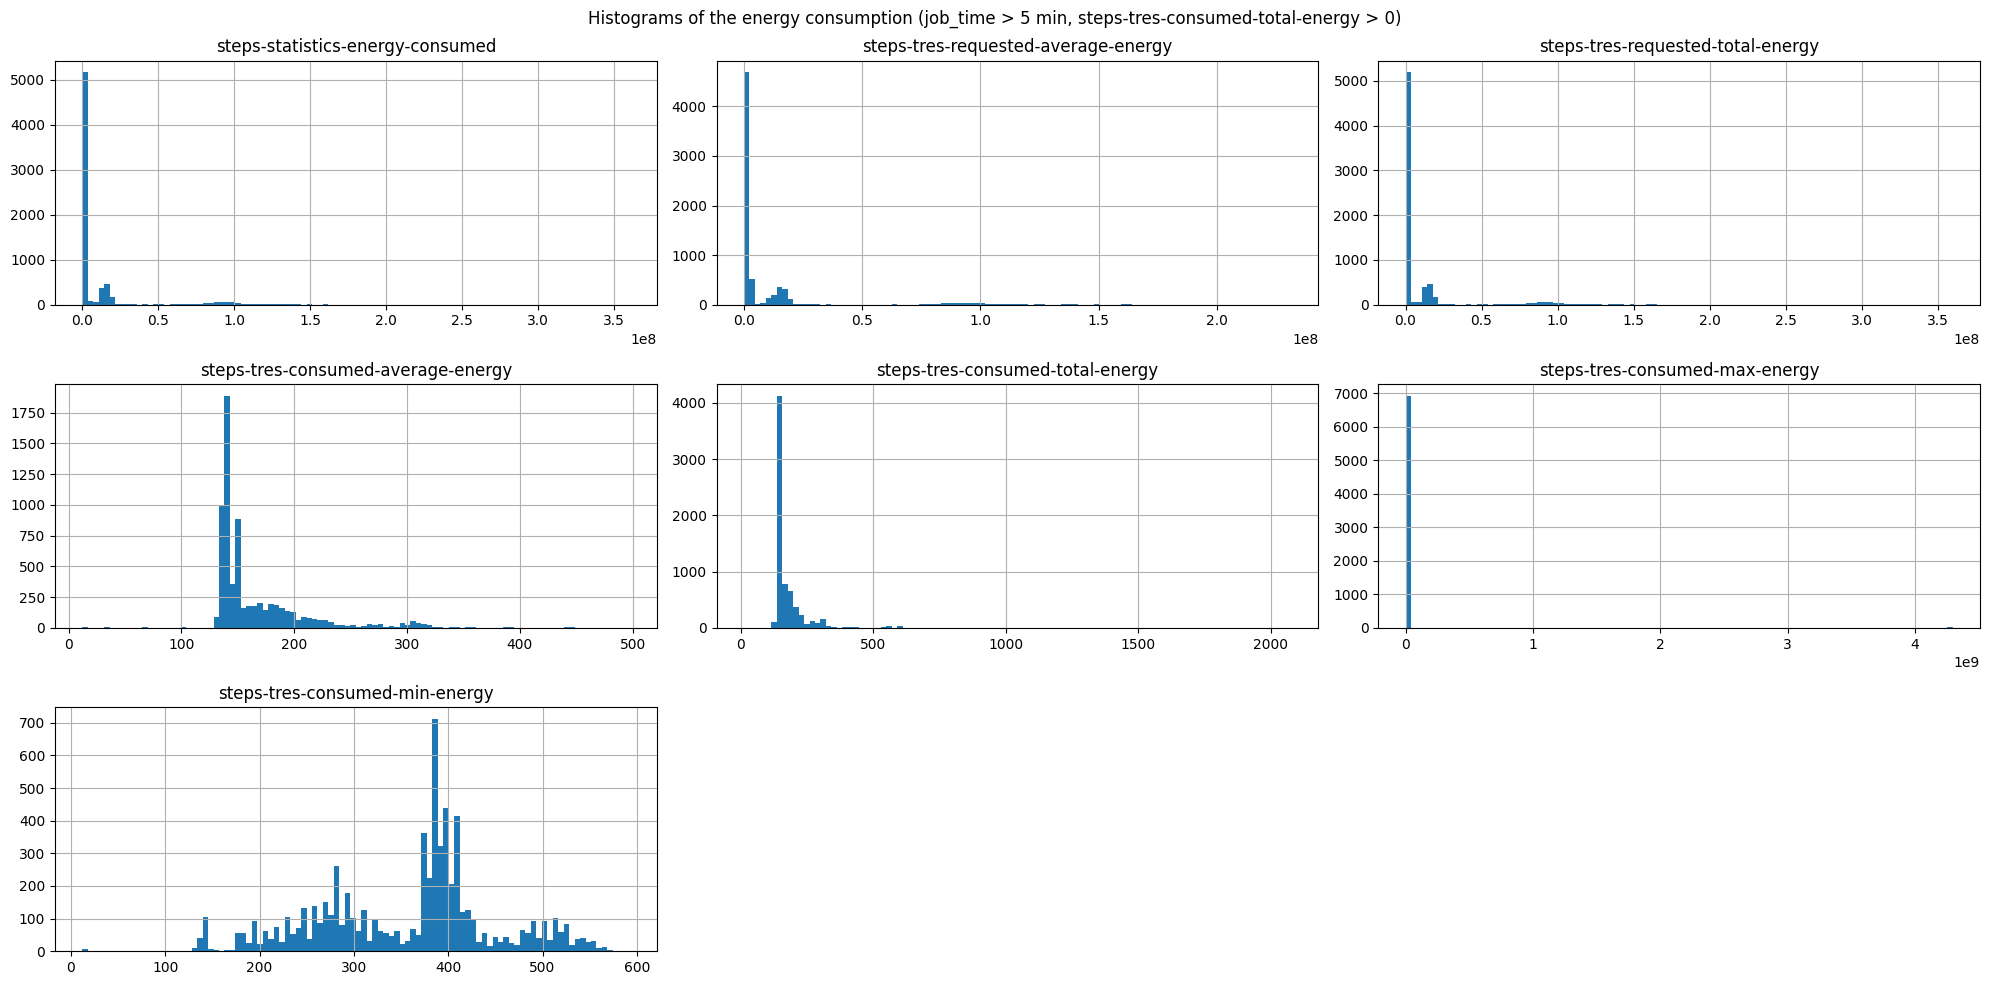

In [9]:
# Plot the distribution of the power consumption
columns = [
    'steps-statistics-energy-consumed',
    'steps-tres-requested-average-energy',
    'steps-tres-requested-total-energy',
    'steps-tres-consumed-average-energy',
    'steps-tres-consumed-total-energy',
    'steps-tres-consumed-max-energy',
    'steps-tres-consumed-min-energy',
]

df_saact[columns].hist(figsize=(20, 10), bins=100)
plt.suptitle('Histograms of the energy consumption (job_time > 5 min, steps-tres-consumed-total-energy > 0)')
plt.tight_layout()
plt.savefig('images/_local/energy_consumption_histograms.png')

array([[<AxesSubplot: title={'center': 'steps-statistics-energy-consumed'}>,
        <AxesSubplot: title={'center': 'steps-tres-requested-average-energy'}>,
        <AxesSubplot: title={'center': 'steps-tres-requested-total-energy'}>],
       [<AxesSubplot: title={'center': 'steps-tres-consumed-average-energy'}>,
        <AxesSubplot: title={'center': 'steps-tres-consumed-total-energy'}>,
        <AxesSubplot: title={'center': 'steps-tres-consumed-max-energy'}>],
       [<AxesSubplot: title={'center': 'steps-tres-consumed-min-energy'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

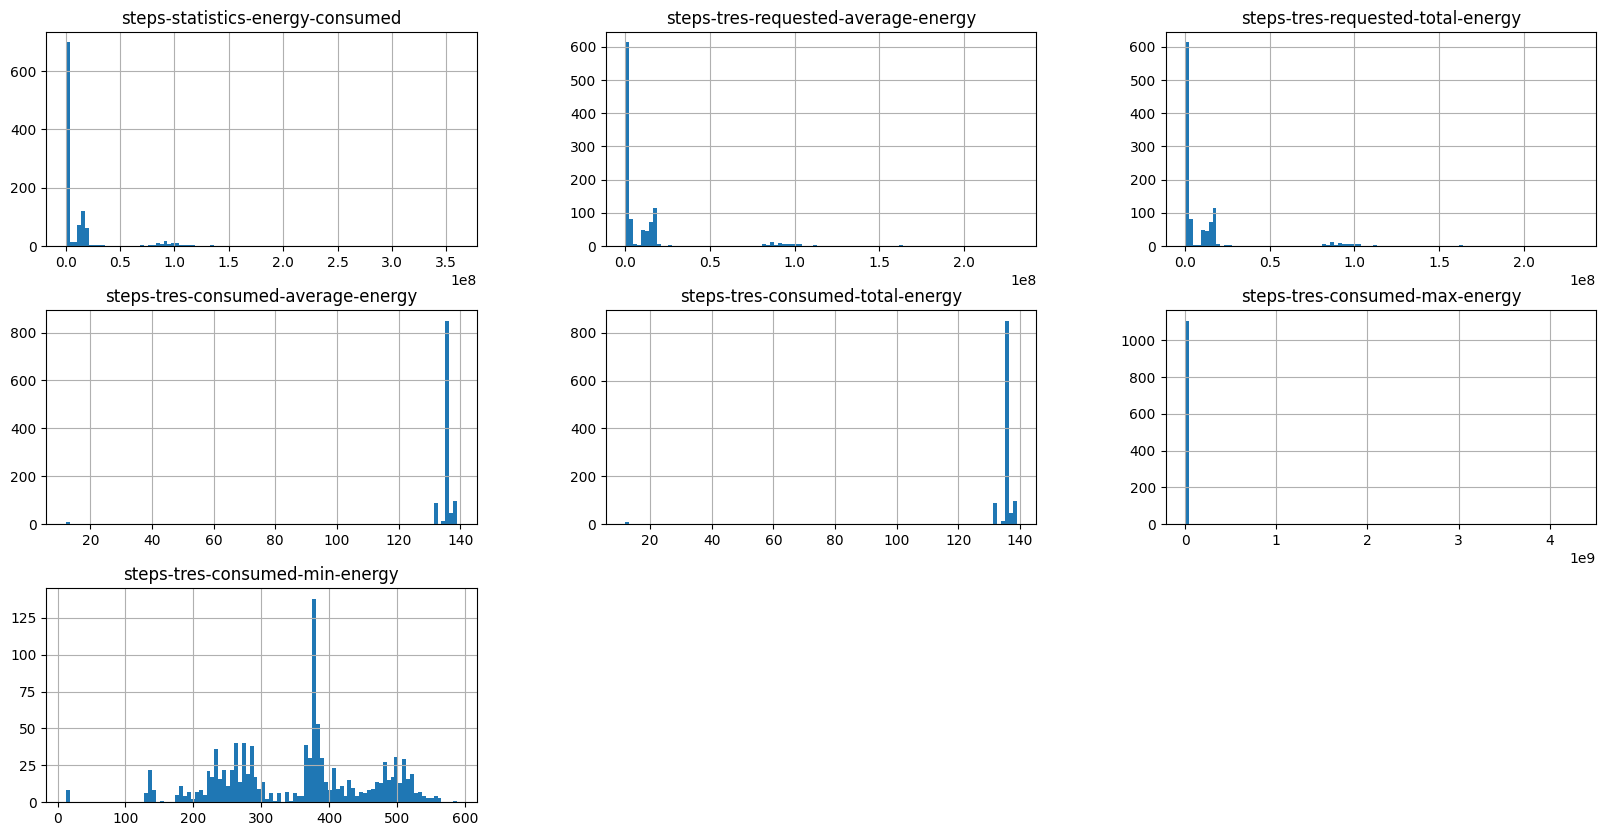

In [10]:
df_saact[df_saact['steps-tres-consumed-total-energy'] < 140][columns].hist(figsize=(20, 10), bins=100)

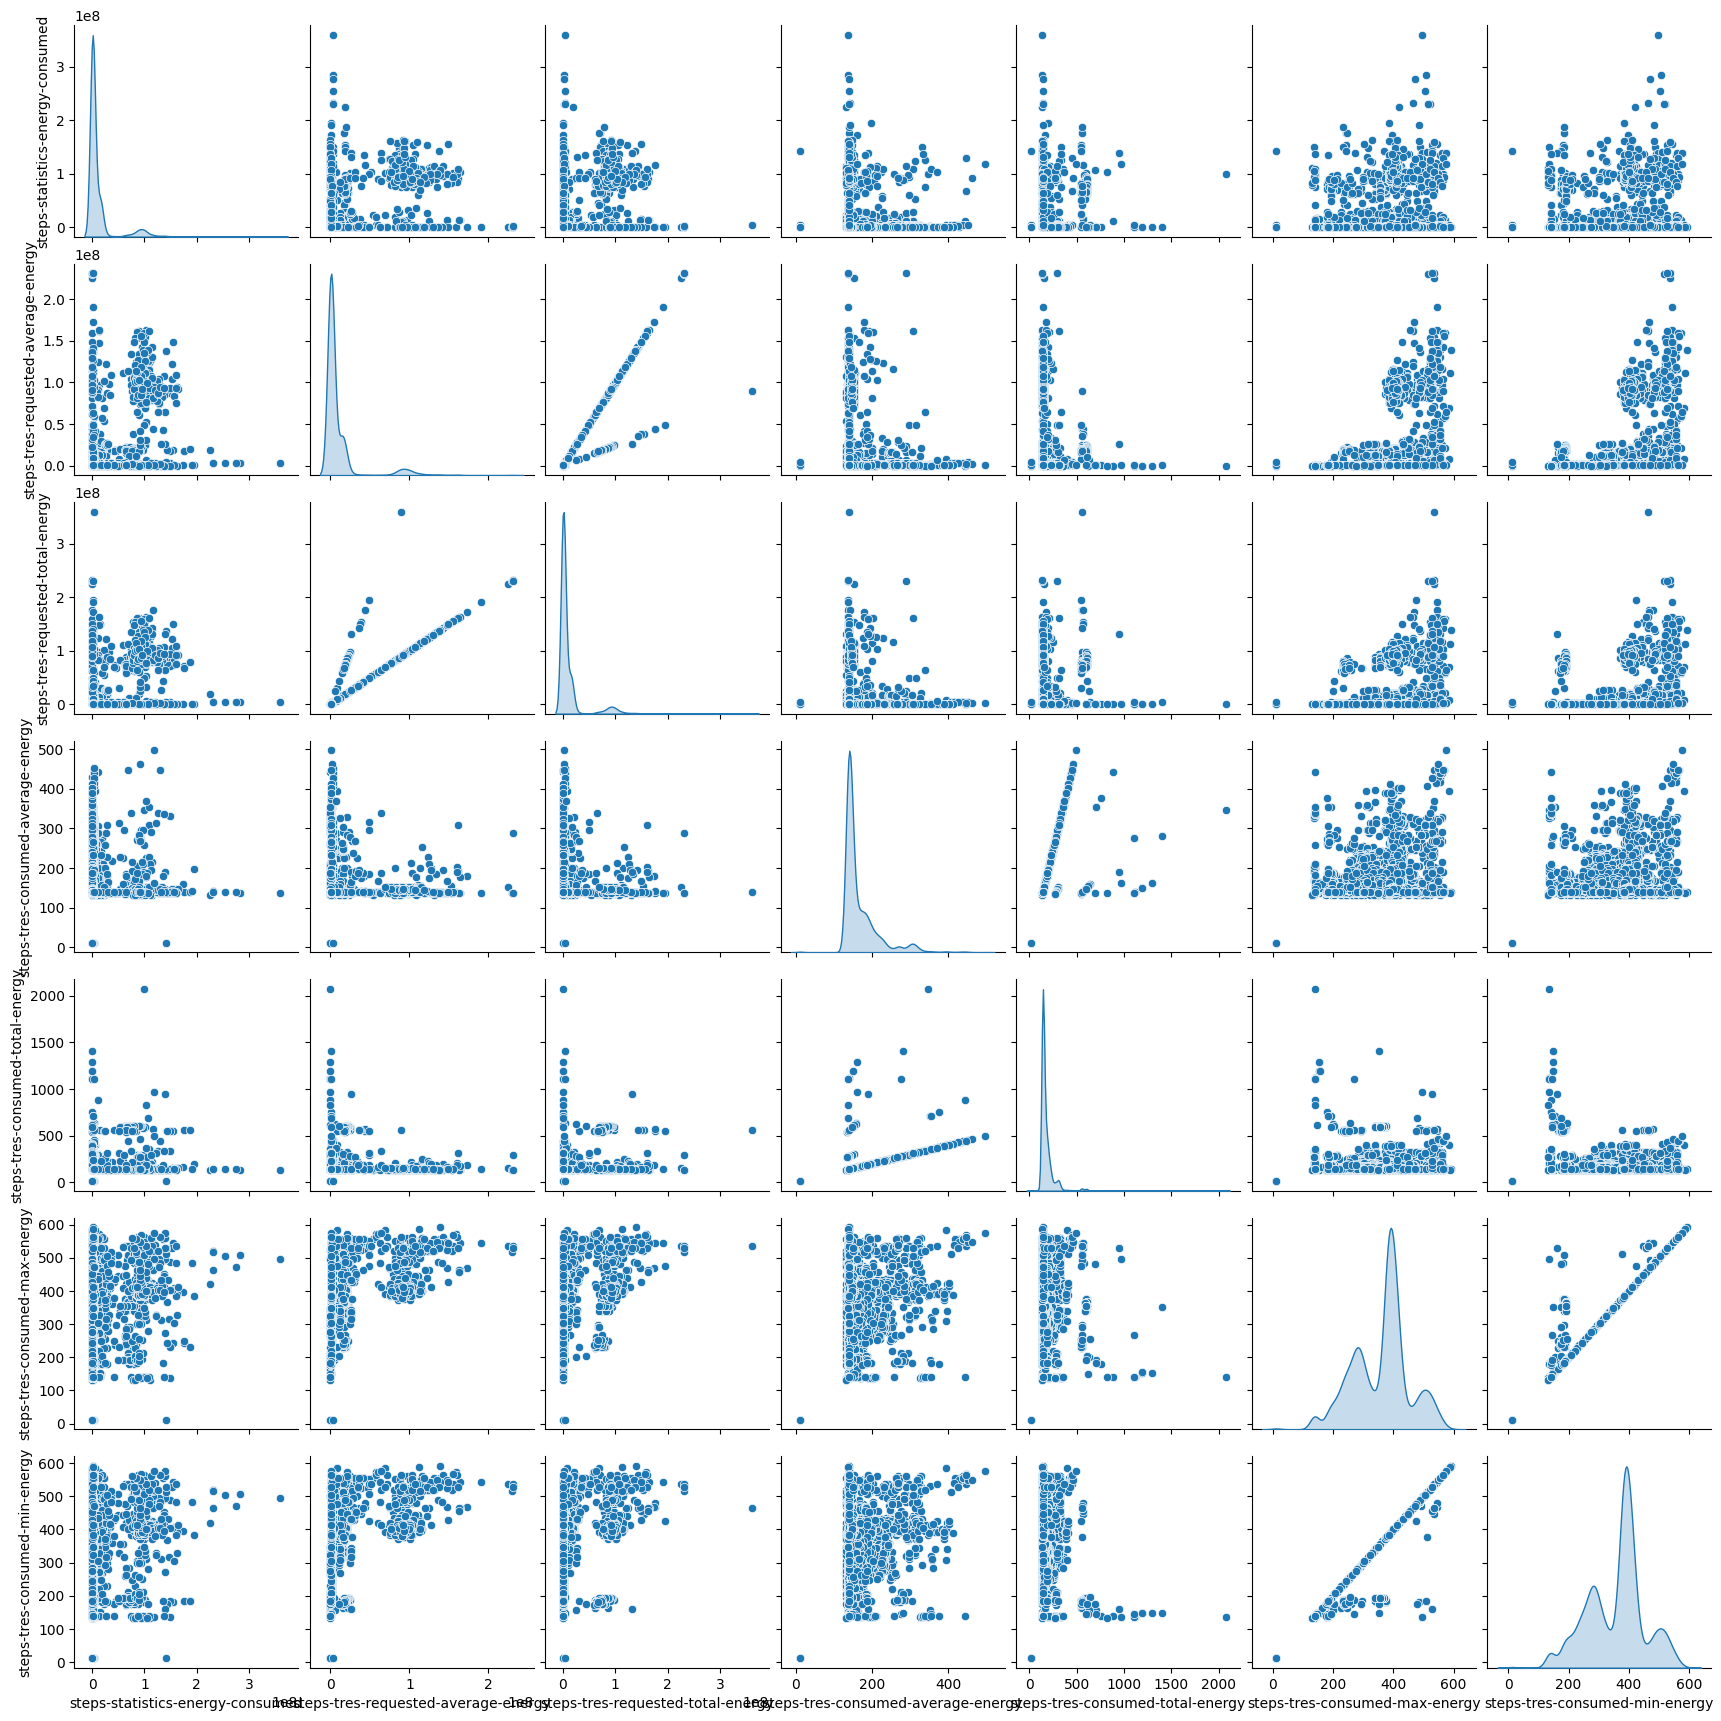

In [11]:
sns.pairplot(df_saact[df_saact['steps-tres-consumed-max-energy'] < 1e9][columns], diag_kind='kde')

In [12]:
df_saact[df_saact['steps-tres-consumed-max-energy'] > 1e9]

,allocation_nodes,constraints,flags,group,nodes,partition,priority,user,required-CPUs,required-memory,state-reason,steps-nodes-list,steps-time-elapsed,steps-time-end,steps-time-start,steps-time-system-microseconds,steps-time-total-microseconds,steps-time-user-microseconds,steps-statistics-energy-consumed,steps-step-job_id,steps-tres-requested-average-energy,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
710,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1496,standard,23.0,andrzej,28.0,102400.0,None,['e1496'],49895.0,1.673412e+09,1.673362e+09,0.0,1828.0,1828.0,9819284.0,27247482.0,15176.0,0.0,30352.0,8937472.0,4.294967e+09,564.0,196.0,392.0,48.0,163840.0,2.0
753,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1233,standard,867.0,pharmd,28.0,128000.0,None,['e1233'],168629.0,1.673602e+09,1.673433e+09,1446.0,2169.0,723.0,0.0,27251252.0,10922178.0,0.0,43688712.0,17874944.0,4.294967e+09,192.0,103.0,412.0,32.0,409600.0,4.0
754,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1271,standard,867.0,pharmd,28.0,128000.0,None,['e1271'],166903.0,1.673600e+09,1.673433e+09,2116.0,2116.0,0.0,63338864.0,27251256.0,11275840.0,0.0,45103360.0,17874944.0,4.294967e+09,480.0,35.0,140.0,32.0,409600.0,4.0
755,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1310,standard,867.0,pharmd,28.0,128000.0,None,['e1310'],170214.0,1.673604e+09,1.673434e+09,1440.0,2160.0,720.0,80422446.0,27251257.0,10380375.0,0.0,41521502.0,17874944.0,4.294967e+09,528.0,35.0,140.0,32.0,409600.0,4.0
756,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1344,standard,867.0,pharmd,28.0,128000.0,None,['e1344'],166304.0,1.673600e+09,1.673434e+09,1425.0,2137.0,712.0,0.0,27251259.0,5580853.0,0.0,22323412.0,17874944.0,4.294967e+09,380.0,35.0,140.0,32.0,409600.0,4.0
757,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1477,standard,867.0,pharmd,28.0,128000.0,None,['e1477'],167555.0,1.673601e+09,1.673434e+09,2190.0,2190.0,0.0,77947800.0,27251260.0,6193460.0,0.0,24773842.0,17874944.0,4.294967e+09,284.0,34.0,138.0,32.0,409600.0,4.0
766,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1230,altair,1071.0,beata94,24.0,2048.0,None,['e1230'],3990.0,1.673439e+09,1.673435e+09,944.0,1888.0,944.0,0.0,27251300.0,15858106.0,0.0,63432424.0,17874944.0,4.294967e+09,184.0,104.0,416.0,32.0,409600.0,4.0
769,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1181,standard,29.0,piotrk,28.0,131072.0,None,['e1181'],2306.0,1.673437e+09,1.673435e+09,0.0,2053.0,2053.0,725680.0,27251306.0,23559046.0,0.0,94236186.0,17874944.0,4.294967e+09,464.0,104.0,418.0,32.0,409600.0,4.0
798,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e[1556-1559],standard,987.0,irekmosaic,32.0,102400.0,None,"['e1556', 'e1557', 'e1558', 'e1559']",116113.0,1.673555e+09,1.673439e+09,4088.0,8128.0,4040.0,97729018.0,27252159.0,15466529.0,0.0,61866116.0,17874944.0,4.294967e+09,180.0,108.0,432.0,32.0,409600.0,4.0
799,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,"e[2281,2286-2288]",standard,987.0,irekmosaic,32.0,102400.0,None,"['e2281', 'e2286', 'e2287', 'e2288']",141176.0,1.673581e+09,1.673439e+09,4791.0,8342.0,3551.0,96932408.0,27252160.0,13266269.0,0.0,53065076.0,17874944.0,4.294967e+09,180.0,108.0,432.0,32.0,409600.0,4.0


In [15]:
# Create mask that filters jobs where any of the energy columns is 0
mask = (df_saact['steps-statistics-energy-consumed'] == 0) \
| (df_saact['steps-tres-requested-average-energy'] == 0) \
| (df_saact['steps-tres-requested-total-energy'] == 0) \
| (df_saact['steps-tres-consumed-average-energy'] == 0) \
| (df_saact['steps-tres-consumed-total-energy'] == 0) \
| (df_saact['steps-tres-consumed-max-energy'] == 0) \
| (df_saact['steps-tres-consumed-min-energy'] == 0) \
| (df_saact['steps-tres-consumed-max-energy'] > 1e9)


df_saact_clean = df_saact[~mask]

array([[<AxesSubplot: title={'center': 'steps-statistics-energy-consumed'}>,
        <AxesSubplot: title={'center': 'steps-tres-requested-average-energy'}>,
        <AxesSubplot: title={'center': 'steps-tres-requested-total-energy'}>],
       [<AxesSubplot: title={'center': 'steps-tres-consumed-average-energy'}>,
        <AxesSubplot: title={'center': 'steps-tres-consumed-total-energy'}>,
        <AxesSubplot: title={'center': 'steps-tres-consumed-max-energy'}>],
       [<AxesSubplot: title={'center': 'steps-tres-consumed-min-energy'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

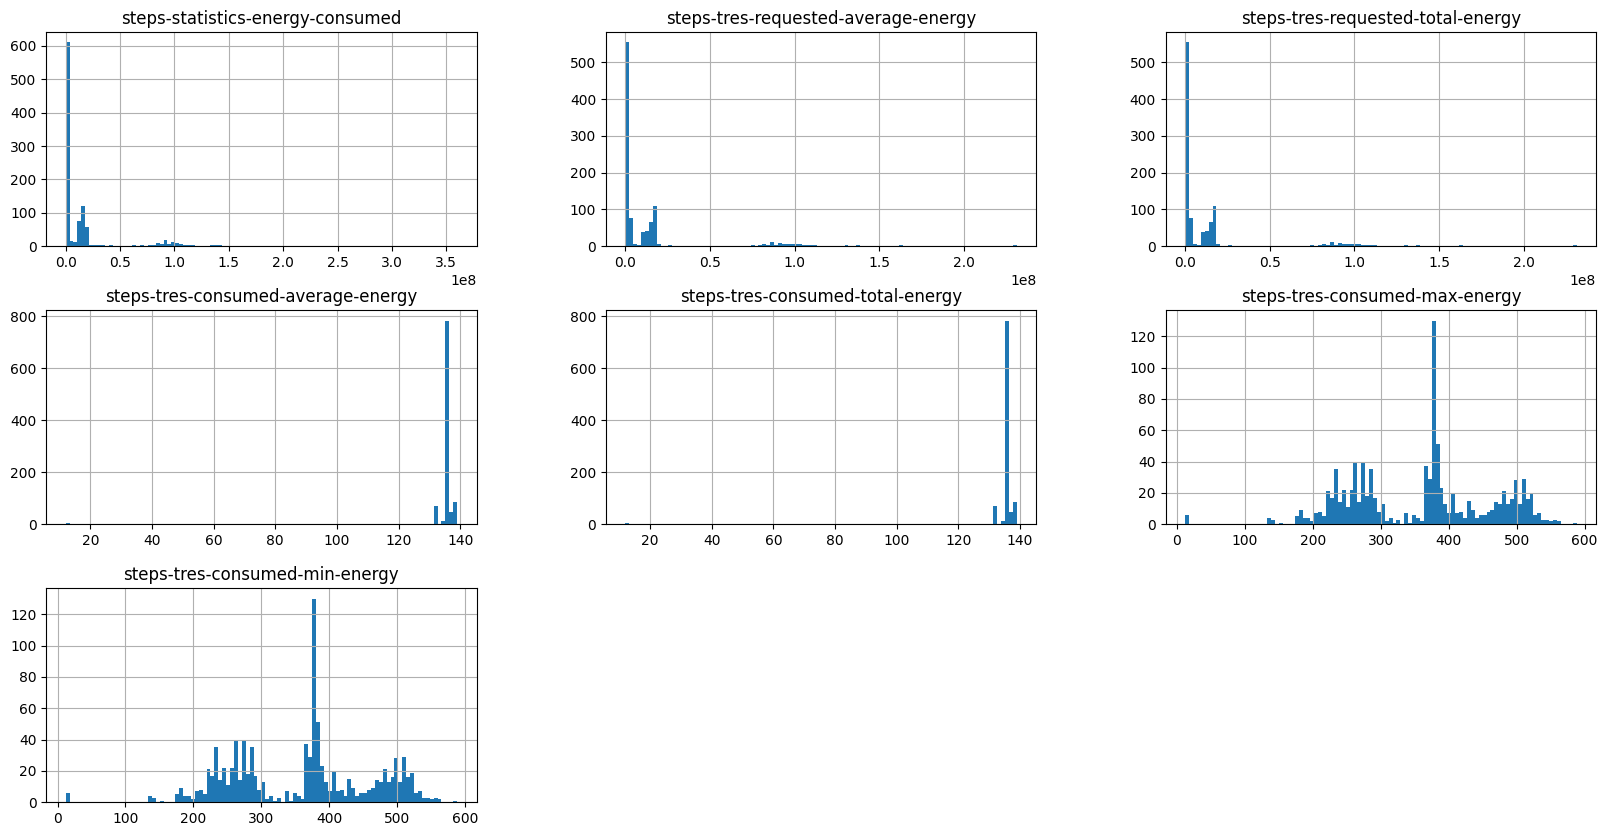

In [22]:
df_saact_clean[df_saact_clean['steps-tres-consumed-total-energy'] < 140][columns].hist(figsize=(20, 10), bins=100)

In [23]:
df_saact_clean = df_saact_clean[df_saact_clean['steps-tres-consumed-total-energy'] < 140]
df_saact_clean

,allocation_nodes,constraints,flags,group,nodes,partition,priority,user,required-CPUs,required-memory,state-reason,steps-nodes-list,steps-time-elapsed,steps-time-end,steps-time-start,steps-time-system-microseconds,steps-time-total-microseconds,steps-time-user-microseconds,steps-statistics-energy-consumed,steps-step-job_id,steps-tres-requested-average-energy,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node
4,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1557,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1557'],11142.0,1.673536e+09,1.673525e+09,1061.0,2122.0,1061.0,4501440.0,26081314.0,4501440.0,0.0,4501440.0,4468736.0,468.0,468.0,136.0,136.0,24.0,49152.0,1.0
5,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1212,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1212'],10587.0,1.673557e+09,1.673546e+09,1033.0,2066.0,1033.0,4689870.0,26081315.0,4689870.0,0.0,4689870.0,4468736.0,516.0,516.0,136.0,136.0,24.0,49152.0,1.0
6,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1212,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1212'],12498.0,1.673602e+09,1.673590e+09,2144.0,2144.0,0.0,5683542.0,26081317.0,5683542.0,0.0,5683542.0,4468736.0,536.0,536.0,136.0,136.0,24.0,49152.0,1.0
7,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1722,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1722'],10955.0,1.673644e+09,1.673633e+09,2175.0,2175.0,0.0,4852568.0,26081319.0,4852568.0,0.0,4852568.0,4468736.0,516.0,516.0,136.0,136.0,24.0,49152.0,1.0
10,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],staff,e1529,standard,1434.0,kulka,24.0,2048.0,BeginTime,['e1529'],10781.0,1.673708e+09,1.673698e+09,1421.0,2131.0,710.0,4644524.0,26081322.0,4644524.0,0.0,4644524.0,4468736.0,512.0,512.0,136.0,136.0,24.0,49152.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6811,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1713,standard,3.0,andrzej,28.0,122880.0,None,['e1713'],276024.0,1.674688e+09,1.674412e+09,836.0,2169.0,1333.0,79758992.0,27355290.0,92066200.0,0.0,92066200.0,4468736.0,528.0,528.0,136.0,136.0,28.0,122880.0,1.0
6871,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1703,standard,3.0,andrzej,28.0,122880.0,None,['e1703'],323598.0,1.674747e+09,1.674424e+09,1481.0,2155.0,674.0,92609306.0,27355362.0,645520.0,0.0,645520.0,4468736.0,340.0,340.0,136.0,136.0,28.0,131072.0,1.0
6893,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e2226,standard,3.0,andrzej,28.0,122880.0,None,['e2226'],363746.0,1.674788e+09,1.674425e+09,983.0,1966.0,983.0,101309264.0,27355384.0,927652.0,0.0,927652.0,4468736.0,336.0,336.0,132.0,132.0,28.0,131072.0,1.0
6894,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e2229,standard,3.0,andrzej,28.0,122880.0,None,['e2229'],364434.0,1.674789e+09,1.674425e+09,1875.0,1875.0,0.0,99698812.0,27355385.0,730740.0,0.0,730740.0,4468736.0,348.0,348.0,136.0,136.0,28.0,131072.0,1.0


## COMBINE SAACT AND ELASTIC

Index(['date', 'hostname', 'cpu1', 'cpu2', 'power', 'cpus_alloc'], dtype='object')
Lowest date 2023-01-04 00:07:02+01:00, highest date 2023-01-31 23:59:02+01:00


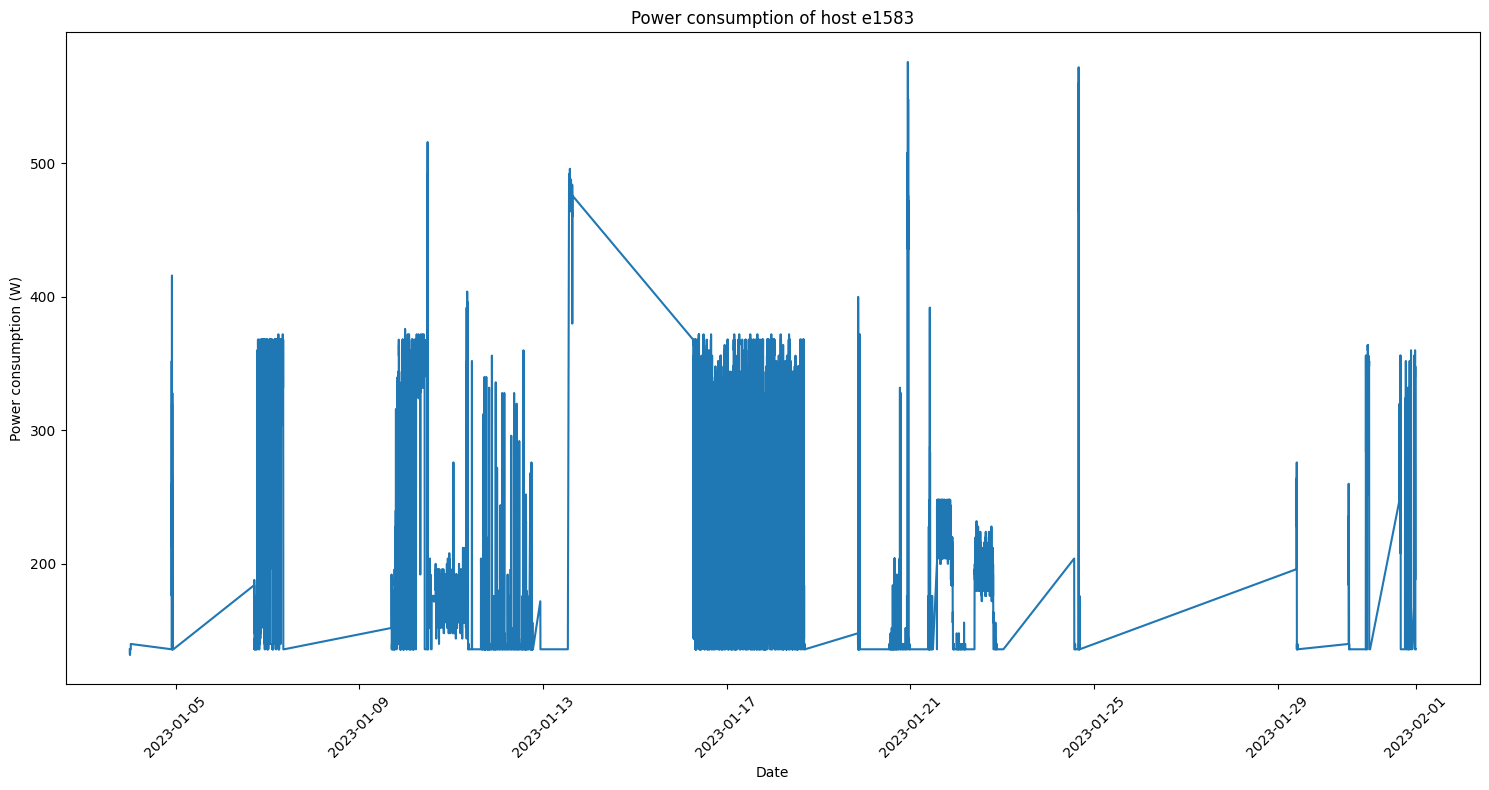

In [49]:
# plot the same with plotly in browser
import plotly.express as px
import plotly.io as pio

hostname = 'e1583'

fig, ax = plt.subplots(1, 1, figsize=(15, 8))
plot_power_timeseries_of_host(hostname, ax)
plt.tight_layout()
plt.show()

# # set render to browser
# pio.renderers.default = "browser"

# fig = px.scatter(df_slurm[df_slurm['hostname'] == hostname], x='date', y='power')
# fig.update_layout(title=f'Power consumption of host {hostname}')
# fig.show()

In [97]:
df = pd.read_csv('data/jobs_flattened_cleaned_1.csv')
[c for c in df.columns if 'cpu' in c]

['steps-tres-requested-max-cpu',
 'steps-tres-requested-max-cpu-node',
 'steps-tres-requested-min-cpu',
 'steps-tres-requested-min-cpu-node',
 'steps-tres-requested-average-cpu',
 'steps-tres-requested-total-cpu',
 'steps-tres-allocated-cpu',
 'tres-allocated-cpu',
 'tres-requested-cpu']

In [103]:
cols = ['steps-tres-requested-max-cpu',
 'steps-tres-requested-max-cpu-node',
 'steps-tres-requested-min-cpu',
 'steps-tres-requested-min-cpu-node',
 'steps-tres-requested-average-cpu',
 'steps-tres-requested-total-cpu',
 'steps-tres-allocated-cpu',
 'tres-allocated-cpu',
 'tres-requested-cpu']

df['steps-tres-requested-min-cpu'].value_counts()

0.0    11712
Name: steps-tres-requested-min-cpu, dtype: int64

Index(['date', 'hostname', 'cpu1', 'cpu2', 'power', 'cpus_alloc'], dtype='object')
Lowest date 2023-01-03 12:40:02+01:00, highest date 2023-01-31 23:59:01+01:00
Index(['date', 'hostname', 'cpu1', 'cpu2', 'power', 'cpus_alloc'], dtype='object')
Lowest date 2023-01-03 12:40:02+01:00, highest date 2023-01-31 23:59:01+01:00


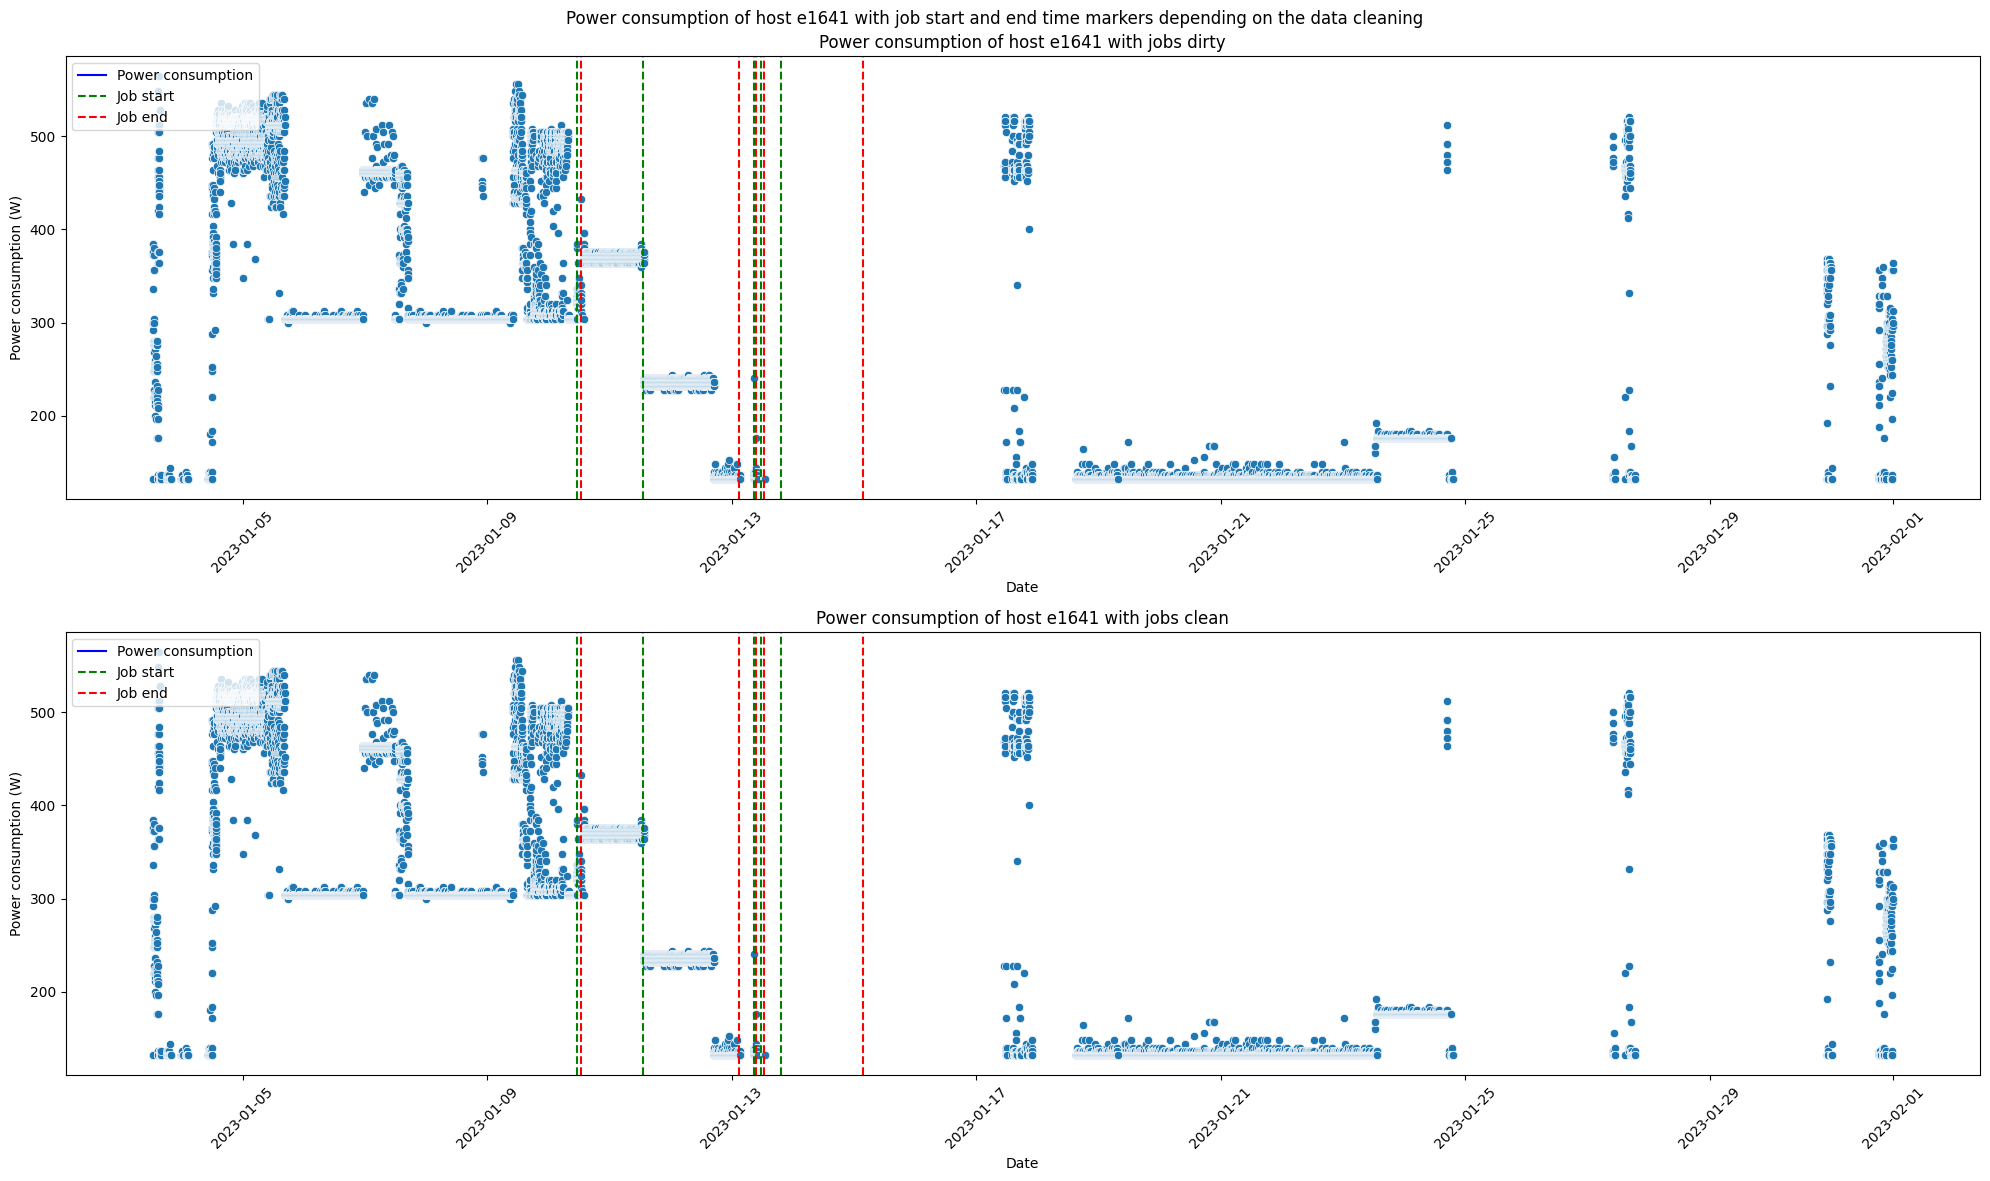

,allocation_nodes,constraints,flags,group,nodes,partition,priority,user,required-CPUs,required-memory,state-reason,steps-nodes-list,steps-time-elapsed,steps-time-end,steps-time-start,steps-time-system-microseconds,steps-time-total-microseconds,steps-time-user-microseconds,steps-statistics-energy-consumed,steps-step-job_id,steps-tres-requested-average-energy,steps-tres-requested-total-mem,steps-tres-requested-total-energy,steps-tres-requested-total-vmem,steps-tres-consumed-max-energy,steps-tres-consumed-min-energy,steps-tres-consumed-average-energy,steps-tres-consumed-total-energy,steps-tres-allocated-cpu,tres-allocated-cpu,tres-allocated-mem,tres-allocated-node,tres-requested-cpu
480,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1641,standard,25.0,andrzej,28.0,102400.0,None,['e1641'],6067.0,1.673352e+09,1.673346e+09,1436.0,2154.0,718.0,0.0,27245849.0,1412280.0,0.0,1412280.0,4468736.0,256.0,256.0,168.0,168.0,28.0,28.0,102400.0,1.0,28.0
794,4.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,"e[1638,1641,1643-1644]",standard,987.0,irekmosaic,32.0,102400.0,None,"['e1638', 'e1641', 'e1643', 'e1644']",135594.0,1.673575e+09,1.673439e+09,6155.0,8158.0,2003.0,63432424.0,27252155.0,20560821.0,0.0,82243284.0,17874944.0,376.0,180.0,151.0,604.0,32.0,32.0,409600.0,4.0,32.0
2207,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1641,fast,108.0,andrzej,28.0,102400.0,None,['e1641'],3362.0,1.673599e+09,1.673596e+09,0.0,2050.0,2050.0,460800.0,27268408.0,471918.0,0.0,471918.0,4468736.0,232.0,232.0,136.0,136.0,28.0,28.0,102400.0,1.0,28.0
2737,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1641,standard,22.0,andrzej,28.0,102400.0,None,['e1641'],3295.0,1.673610e+09,1.673607e+09,2109.0,2109.0,0.0,784860.0,27270356.0,656320.0,0.0,656320.0,4468736.0,392.0,392.0,212.0,212.0,28.0,28.0,102400.0,1.0,28.0
3546,1.0,no-constraints,['CLEAR_SCHEDULING'- 'STARTED_ON_SCHEDULE'],users,e1641,standard,20.0,andrzej,28.0,102400.0,None,['e1641'],116272.0,1.673750e+09,1.673634e+09,1485.0,2156.0,671.0,17547456.0,27274584.0,17146264.0,0.0,17146264.0,4468736.0,364.0,364.0,136.0,136.0,28.0,28.0,102400.0,1.0,28.0


In [108]:
from matplotlib.lines import Line2D


hostname = 'e1641'
fig, ax = plt.subplots(2, 1, figsize=(20, 12))
ax = ax.flatten()
for i, dirty in enumerate([True, False]):
    if not dirty:
        df = pd.read_csv('data/jobs_step_1_final1.csv')
    else:
        df = pd.read_csv('data/jobs_step_1_final_dirty1.csv')

    m = [hostname in x for x in df['steps-nodes-list']]
    host_data = df[m]

    host_start_times = host_data['steps-time-start'].astype('datetime64[s]')
    host_end_times = host_data['steps-time-end'].astype('datetime64[s]')

    plot_power_timeseries_of_host(hostname, ax[i])

    # Add vertical red lines for the start times of the jobs
    for start_time in host_start_times:
        ax[i].axvline(start_time, color='green', linestyle='--')
    # Add vertical red lines for the end times of the jobs
    for end_time in host_end_times:
        ax[i].axvline(end_time, color='red', linestyle='--')

    # Add legend 
    ax[i].legend(labels=['Power consumption', 'Job start', 'Job end'], 
            loc='upper left', 
            handles=[
                Line2D([0], [0], color='blue', linestyle='-'),
                Line2D([0], [0], color='green', linestyle='--'), 
                Line2D([0], [0], color='red', linestyle='--')
                ]
            )
    
    ax[i].set_title(f'Power consumption of host {hostname} with jobs {"dirty" if dirty else "clean"}')


plt.suptitle(f'Power consumption of host {hostname} with job start and end time markers depending on the data cleaning')
plt.tight_layout()

plt.savefig(f'images/_local/power_consumption_{hostname}_with_jobs.png')

plt.show()

host_data